In this example we will load an image and then buil a matrix that we will call `pixels` and will look like this:

\begin{bmatrix}
r_1 & g_1 & b_1\\
\vdots & \vdots & \vdots\\
r_n & g_n & b_n
\end{bmatrix}

In this matrix each row represent the color of a given pixel in the image in the RGB space and the columns represent the intensity in a specific color.

We will use this matrix to train our SOM and then we will quantize the original set of colors to obtain a smaller set of colors that will segment the image into uniform areas.

training...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: tensor(0.1206)
quantization...
building new image...
done.


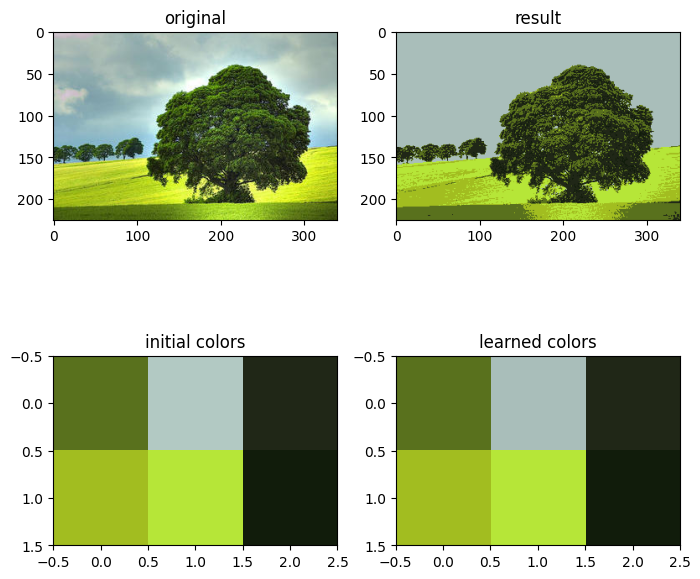

In [1]:
from minisom import MiniSom

import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read the image
img = plt.imread('tree.jpg')

# reshaping the pixels matrix
pixels = torch.tensor(np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255., dtype=torch.float32)

# SOM initialization and training
print('training...')
som = MiniSom(2, 3, 3, sigma=1.,
              learning_rate=0.2, neighborhood_function='bubble', random_seed=20)  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().numpy().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q
print('done.')

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.savefig('resulting_images/som_color_quantization.png')
plt.show()